# Orders - Multivariate Regression of review_score

In [1]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [ ]:
#import data
from olist.order import Order
data = Order().get_training_data()

Let's recall our simple analysis from yesterday's exercice: 

Based our the correlation matrix below, we notice that `review_score` is mostly correlated with the two features `wait_time` and `delay_vs_expected`. However, these two features are also highly correlated together. In this exercice, we will use `statsmodel` to distinguish the effect of one feature, **keeping the other fixed**.

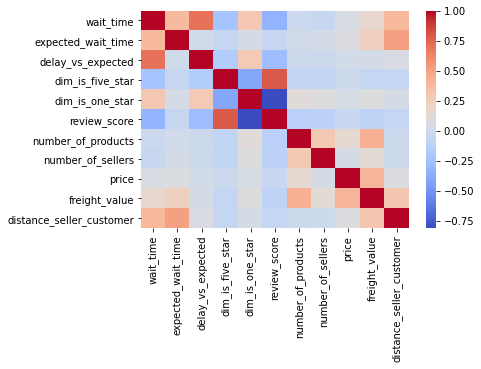

In [4]:
sns.heatmap(data.corr(), cmap='coolwarm')

(0.0, 5.929633086202845)

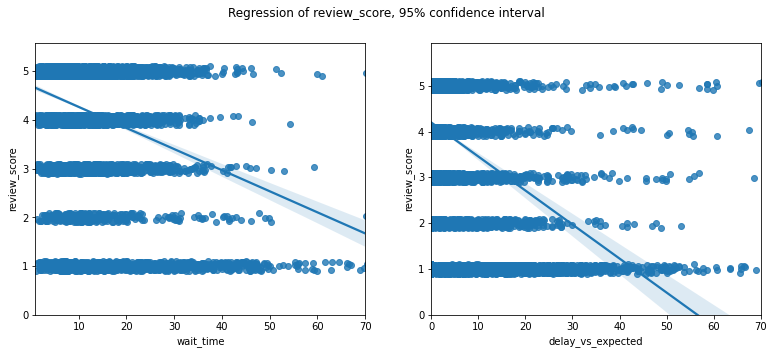

In [5]:
sample = data.sample(10000, random_state=42)
plt.figure(figsize=(13,5))
plt.suptitle('Regression of review_score, 95% confidence interval')
plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x = data.delay_vs_expected, y= data.review_score, y_jitter=.1, ci=95)
plt.xlim(right=70)
plt.ylim(bottom=0)

## 1 - Univariate regression

❓Use [statsmodels](statsmodels.org) instead of seaborn to make 
 - an OLS regression (`model1`) of `review_score` over `wait_time`
 - an OLS regression (`model2`) of `review_score` over `delay_vs_expected`
 
For each, Print the `summary` table and interpret results:
- Make sure to understand how these results match those of seaborn regplot
- Read the regression performance metric R-square, as well as individual regressions coefficients, t-values, p-values, and 95% confidence intervals

In [6]:
#import modules 
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1]:
# YOUR CODE HERE

## 2 - Multivariate regression

❓ What is the impact on `review_score` of adding one day of `delay_vs_expected` to the order, **holding `wait_time` constant**? Which of the two feature is the most explicative for low `review_score`?

For that purpose, run an OLS model `model3` where both `wait_time` and `delay_vs_expected` are the dependent variables, and `review_score` is the target variable

In [8]:
# Your code here

👉 Your answer:

----
❓Our multivariate regression have allowed us to isolate the impact of one feature, whilst controlling for the effect of other features. These new coefficients are called **partial correlation** coefficients. 

- Plot the **partial regression plots** using the handy [`statsmodels.graphics.plot_partregress_grid`](https://www.statsmodels.org/stable/generated/statsmodels.graphics.regressionplots.plot_partregress_grid.html).
- Contrary to the **simple regression plots** with seaborn above, what can you say about the relative slopes for `wait_time` and `delay_vs_expected`? 
 
<details>
    <summary>Hint</summary>
e(variable|X) stands for "error" (i.e deviation) of the variable around its mean value. We are only interested in the slope of the partial correlation but not it's intercept: all the lines cross through [0,0]
</details>

In [3]:
# Your code

---
❓ R-square is quite low: no more than 12% of the variation of review_score is explained  by the variations of `wait_time` and `delay_vs_expected`. Let's try to add more feature to our regression to improve explainability.

- Create a new OLS `model4` with more features from `orders` dataset.
    - Do not to create **data leaks**: do not to add features that are directly derived from the `review_score`
    - Do not add features perfectly colinear to each other
    - z-standardize $z = \frac{x - \mu}{\sigma}$ each features in order to be able to compare their relative coefficients together 
- What are the most important features?
- How has the overall regression performance changed?
- Is this regression statistically significant?

In [12]:
# Select features

In [14]:
# standardize features

In [16]:
# Create and train model4

<details>
    <summary>💡Explanations</summary>
    
- These partial regression coefficients are more informative than the simple correlation coefficients in explaining the relative impact of each feature in explaining review_score.
    - Wait time remains the biggest explanatory variable
    - The more products and sellers there are for a single order, the lower the review_score. Distance plays also a role.
    - We cannot conclude anything about price and freight_value: p-values are too high
    
- Overall, this multivariate regression remains statistically significant, because its F-statistics is much greater than 1 (at least one features have a very low p-value)

- R-square isn't increased by much. Most of the explanability of review_score lies outside of the orders dataset.

Low R-square is frequent when the number of observation (n) is much higher than the number of features (p). Relevant insights can still be derived from such regressions, provided they are statistically significant
</details>



## 3 - Check model performance

Regression performance should not be measured only by it's R-square!  

It's alway a good idea to visualize the distribution of the predictions, and especially residuals.

❓ Compute the residuals, and the associated RMSE. Plot the `residuals` in a histogram.

In [4]:
# Your code

❓Not that easy to interpret? Plot in the same axe the histogram of `review_score` as well as that of the `predicted_review_score` for each rows of the dataset. Compare also the mean of the two distributions

In [5]:
# Your code here

In [6]:
# Means should be equals in a OLS regression

❓Another common way to visualize residuals is the [QQplot](https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html). Plot it below and make sure to understand the link with the histogram above.

❓ Create a box plot (or a violin plot) of the residuals, splitted by `review_score`

In [7]:
# Your code here

<details>
    <summary>Solution</summary>
👉 A violinplot would be the best approach. We can see that our model is better at predicting 4 stars than any other scores...which is obvious because review_score.mean()=4.14</details>

✅ Great job! Don't forget to *save*, *commit* and *push* this notebook when you are done